In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [191]:
df = pd.read_csv('Health_insurance.csv')

#Check data

In [192]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [193]:
df.shape

(1338, 7)

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [195]:
numer_column = df[['age','bmi','children']]

In [196]:
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [197]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [198]:
df['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

In [199]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [200]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4])

In [201]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [202]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [203]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


#Detect outlier

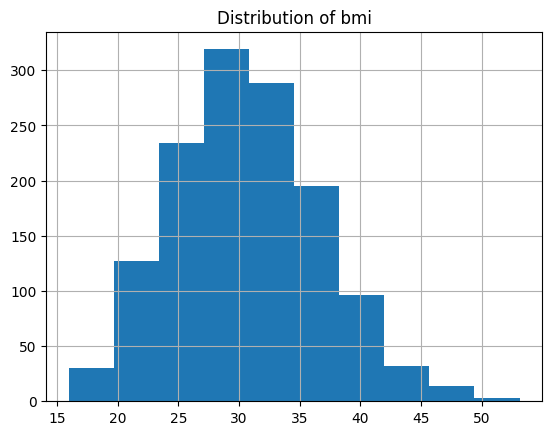

In [204]:
df["bmi"].hist(bins=10)
plt.title("Distribution of bmi")
plt.show()

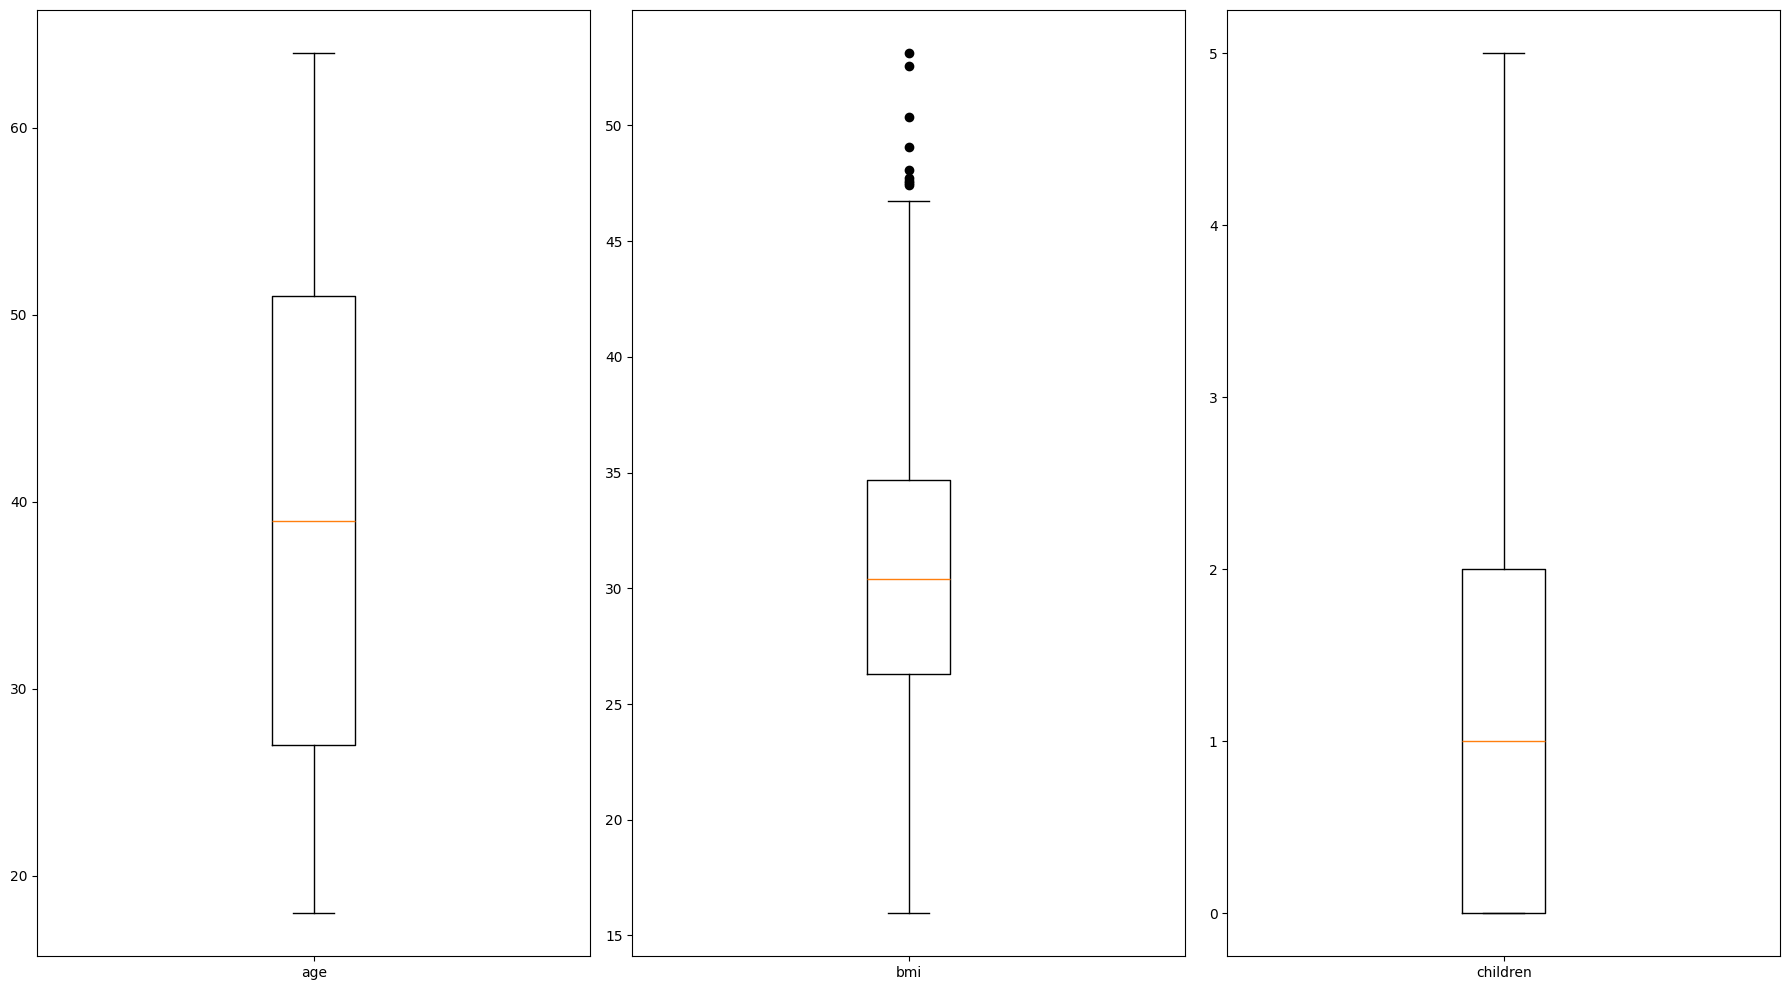

In [205]:
#check Outlier
Prob_outlier = numer_column
fig,axes = plt.subplots(figsize = (18,10), nrows =1 , ncols=3,squeeze = 0)
i = 0
for ax, col in zip(axes.reshape(-1), Prob_outlier):
 ax.boxplot(df[col], tick_labels=[col], sym='k')
plt.tight_layout()

In [206]:
Q1_ratio = df["bmi"].quantile(0.25)
Q3_ratio = df["bmi"].quantile(0.75)
IQR_ratio = Q3_ratio - Q1_ratio
print(f"IQR for bmi is : {IQR_ratio}")

IQR for bmi is : 8.3975


In [207]:
lower_bound_ratio = Q1_ratio - 1.5 * IQR_ratio
upper_bound_ratio = Q3_ratio + 1.5 * IQR_ratio
print(f"lower_bound_ratio : {lower_bound_ratio}")
print(f"upper_bound_ratio : {upper_bound_ratio}")

lower_bound_ratio : 13.7
upper_bound_ratio : 47.290000000000006


In [208]:
df_no_outlier = df[(df['bmi'] >= lower_bound_ratio) & (df['bmi'] <= upper_bound_ratio)]

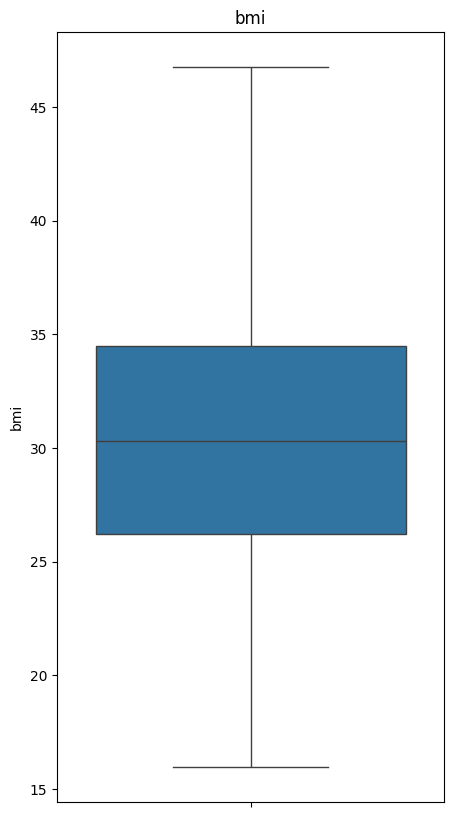

In [209]:
plt.figure(figsize=(5,10))
sns.boxplot(y=df_no_outlier['bmi'])
plt.title('bmi')
plt.show()

In [210]:
df_no_outlier.shape

(1329, 7)

In [211]:
df_no_outlier.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


#Encode

In [234]:
#encoding
col_ob = ['sex','smoker']

In [235]:
df_after_encode = pd.get_dummies(df_no_outlier, columns = col_ob,drop_first = True)

In [236]:
df_after_encode.head()

,age,bmi,children,region,charges,sex_male,smoker_yes
0,19,27.900,0,southwest,16884.92400,False,True
1,18,33.770,1,southeast,1725.55230,True,False
2,28,33.000,3,southeast,4449.46200,True,False
3,33,22.705,0,northwest,21984.47061,True,False
4,32,28.880,0,northwest,3866.85520,True,False


In [237]:
df_after_encode.columns

Index(['age', 'bmi', 'children', 'region', 'charges', 'sex_male',
       'smoker_yes'],
      dtype='object')

In [238]:
df_after_encode["sex_male"] = df_after_encode["sex_male"].astype(int)
df_after_encode["smoker_yes"] = df_after_encode["smoker_yes"].astype(int)


In [239]:
df_after_encode

,age,bmi,children,region,charges,sex_male,smoker_yes
0,19,27.900,0,southwest,16884.92400,0,1
1,18,33.770,1,southeast,1725.55230,1,0
2,28,33.000,3,southeast,4449.46200,1,0
3,33,22.705,0,northwest,21984.47061,1,0
4,32,28.880,0,northwest,3866.85520,1,0
...,...,...,...,...,...,...,...
1333,50,30.970,3,northwest,10600.54830,1,0
1334,18,31.920,0,northeast,2205.98080,0,0
1335,18,36.850,0,southeast,1629.83350,0,0
1336,21,25.800,0,southwest,2007.94500,0,0


In [240]:
df_after_encode.dtypes

,0
age,int64
bmi,float64
children,int64
region,object
charges,float64
sex_male,int64
smoker_yes,int64


In [244]:
df_after_encode.drop('region', axis =1 ,inplace = True)

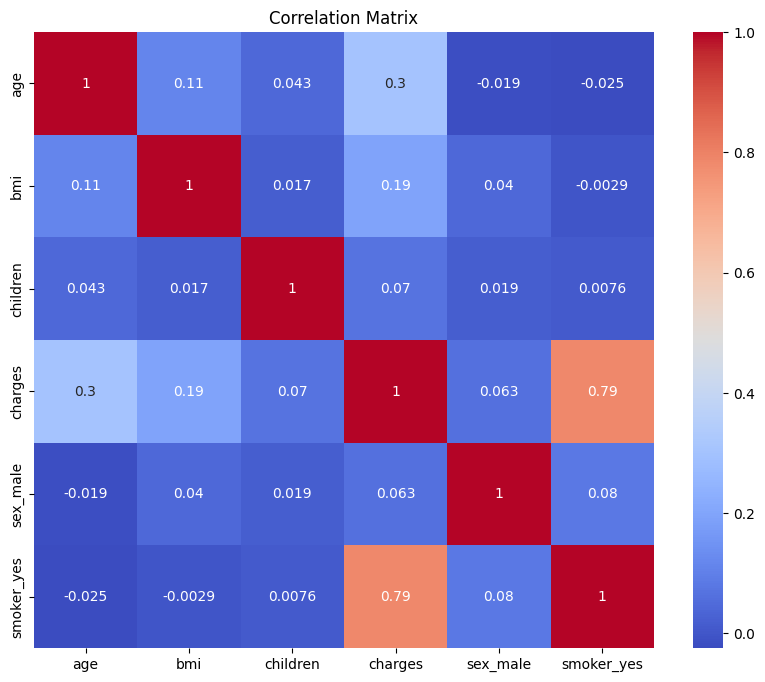

In [245]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_after_encode.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#train model

In [246]:
x = df_after_encode.drop('charges',axis=1).values

In [247]:
x.shape


(1329, 5)

In [248]:
y = df_after_encode[['charges']].values

In [249]:
y.shape


(1329, 1)

In [250]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3 , random_state =0)

In [251]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [263]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor

models = {
    "LinearRegression": LinearRegression(),
    "RandomForestRegressor": RandomForestRegressor(n_estimators=100, random_state=0),
    "GradientBoostingRegressor": GradientBoostingRegressor(n_estimators=100, random_state=0),
    "Ridge": Ridge(alpha=1.0),
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=0),
    "XGBRegressor": xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=0)
}

#calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Loop through each model, train, and evaluate
for model_name, model in models.items():
    print(f"Training model: {model_name}")

    # Train the model
    model.fit(x_train, y_train)

    # Predict the values
    predictions = model.predict(x_test)

    # Evaluate model
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)


    print(f"Results for {model_name}:")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"  Mean Absolute Percentage Error (MAPE): {mape:.4f}")
    print(f"  R²: {r2:.4f}")
    print("-" * 50)


Training model: LinearRegression
Results for LinearRegression:
  Mean Absolute Error (MAE): 4505.1414
  Mean Squared Error (MSE): 42835394.2980
  Root Mean Squared Error (RMSE): 6544.8754
  Mean Absolute Percentage Error (MAPE): 36.5555
  R²: 0.7426
--------------------------------------------------
Training model: RandomForestRegressor


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Results for RandomForestRegressor:
  Mean Absolute Error (MAE): 2669.8936
  Mean Squared Error (MSE): 25535198.9805
  Root Mean Squared Error (RMSE): 5053.2365
  Mean Absolute Percentage Error (MAPE): 171.3012
  R²: 0.8465
--------------------------------------------------
Training model: GradientBoostingRegressor
Results for GradientBoostingRegressor:
  Mean Absolute Error (MAE): 2626.5072
  Mean Squared Error (MSE): 23883242.8814
  Root Mean Squared Error (RMSE): 4887.0485
  Mean Absolute Percentage Error (MAPE): 168.0016
  R²: 0.8565
--------------------------------------------------
Training model: Ridge
Results for Ridge:
  Mean Absolute Error (MAE): 4517.2082
  Mean Squared Error (MSE): 42882096.2220
  Root Mean Squared Error (RMSE): 6548.4423
  Mean Absolute Percentage Error (MAPE): 169.4535
  R²: 0.7423
--------------------------------------------------
Training model: DecisionTreeRegressor
Results for DecisionTreeRegressor:
  Mean Absolute Error (MAE): 2924.2707
  Mean Squared

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Results for XGBRegressor:
  Mean Absolute Error (MAE): 3155.8176
  Mean Squared Error (MSE): 31202520.0859
  Root Mean Squared Error (RMSE): 5585.9216
  Mean Absolute Percentage Error (MAPE): 172.7198
  R²: 0.8125
--------------------------------------------------


<p>จากการเทรนโมเดลต่าง ๆ ผลลัพธ์สรุปได้ว่า

Gradient Boosting Regressor เป็นโมเดลที่ทำผลงานดีที่สุด
เพราะมีค่า MAE (ความผิดพลาดเฉลี่ยแบบสัมบูรณ์) และ RMSE (ค่ารากที่สองของความผิดพลาดเฉลี่ยกำลังสอง) ต่ำที่สุด
และมีค่า R² สูงที่สุด (0.8565) แปลว่าทำนายได้แม่นยำที่สุดในกลุ่มนี้